In [5]:
# Dataset:  salary_Data.csv 
# location: https://mitu.co.in/dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('datasets/Salary_Data.csv')

In [4]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [13]:
# Input and Output

In [76]:
x=  df[['YearsExperience']]  #input data should be 2-dimensional
y=  df['Salary']  # output data should be 1-dimensional always

In [53]:
x.shape

(30, 1)

In [54]:
df. corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


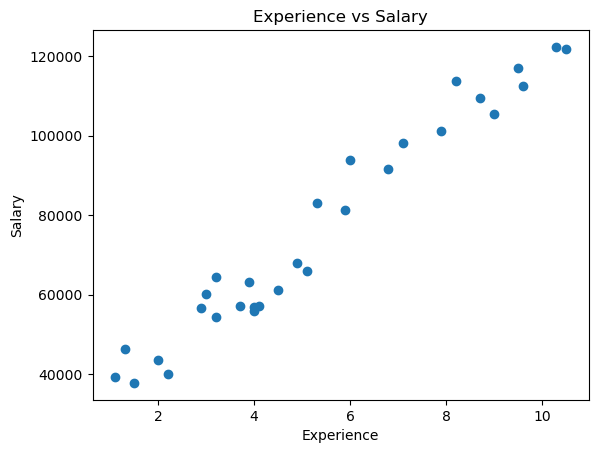

In [55]:
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
#plt.grid()
plt.scatter(x, y)

#### cross validation

In [56]:
# import the function
from sklearn.model_selection import train_test_split

In [57]:
# split the data in training (75%) and testing(25%)
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)

In [58]:
x_train.size

22

In [59]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7
27,9.6
11,4.0


In [60]:
x_test.size


8

In [61]:
# 

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
# create the object
regressor =LinearRegression()

In [64]:
#train the algo
regressor.fit(x_train,y_train)

LinearRegression()

In [65]:
# value of m in the streight line formula

regressor.coef_ 

array([9379.71049195])

In [66]:
#value of c
regressor.intercept_

26986.691316737248

In [67]:
y_new = x*9379.71049195 + 26986.69131674

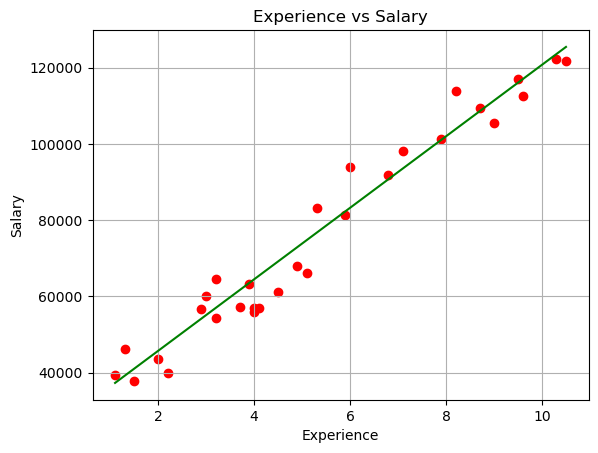

In [68]:
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x, y, color = 'red')
plt.plot(x, y_new, color = 'green')

In [69]:
regressor.predict([[12]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

# predict on the test data

In [70]:
y_pred = regressor.predict(x_test)

In [71]:
y_pred 

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [72]:
result = pd.DataFrame({
        'actual': y_test,
        'predicted': y_pred
    })

In [73]:
result

,actual,predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [74]:
result = pd.DataFrame({
    'x': x_test['YearsExperience'],
     'y': y_test, 
     'y^': y_pred,
    'Error': y_pred - y_test,
    'abs(error)' : abs(y_pred-y_test)
     
     
    })

In [77]:
np.mean(abs(y_pred-y_test))

3508.5455930660555

In [79]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [80]:
result = pd.DataFrame({
    'x': x_test['YearsExperience'],
     'y': y_test, 
     'y^': y_pred,
    'Error': y_pred - y_test,
    'Error^2' : (y_pred-y_test)**2
     
     
    })

In [81]:
result

,x,y,y^,Error,Error^2
2,1.5,37731.0,41056.257055,3325.257055,1.105733e+07
28,10.3,122391.0,123597.709384,1206.709384,1.456148e+06
13,4.1,57081.0,65443.504334,8362.504334,6.993148e+07
10,3.9,63218.0,63567.562235,349.562235,1.221938e+05
26,9.5,116969.0,116093.940990,-875.059010,7.657283e+05
24,8.7,109431.0,108590.172597,-840.827403,7.069907e+05
27,9.6,112635.0,117031.912039,4396.912039,1.933284e+07
11,4.0,55794.0,64505.533285,8711.533285,7.589081e+07


In [82]:
#RMSE
np.sqrt(np.mean((y_pred - y_test)**2))

4733.70258289858

In [83]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

4733.70258289858

# R square Error

In [85]:
mean_val = np.mean(y_test)
mean_val

84406.25

In [86]:
# using the R- Squared Error formula
num = np.sum((y_test - mean_val)**2 ) -np.sum((y_test- y_pred)**2)
r2 =num/np.sum((y_test - mean_val)**2 )
r2

0.9779208335417601

In [90]:
# using function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9779208335417602

In [95]:
regressor.score(x_test,y_test)

0.9779208335417602

In [93]:
regressor.score(x,y)

0.955975487542377

In [94]:
regressor.score(x_train,y_train)

0.9395413526983522

In [91]:
y_pred = regressor.predict(x)

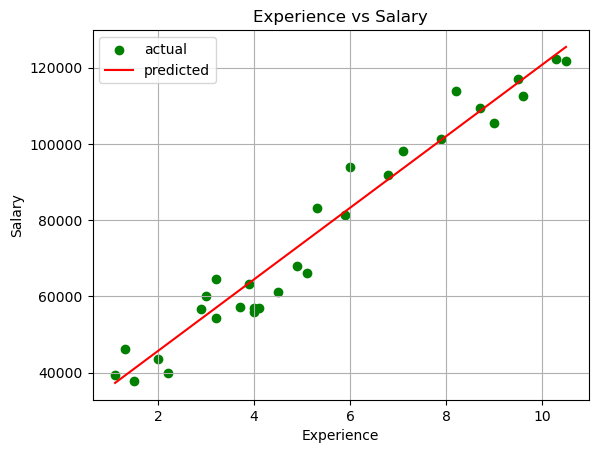

In [92]:
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x, y, color = 'green', label = 'actual')
plt.plot(x, y_pred, color = 'red' , label = 'predicted')
plt.legend()

In [96]:
y_pred = regressor.predict(x_test)

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.05754512646779697

In [100]:
exp = float(input('Enter the Experience: '))
exp = pd.DataFrame({'YearsExperience': [exp]})
sal = regressor.predict(exp)

print('Your Expected salary can be:', sal[0])

Enter the Experience:  7


Your Expected salary can be: 92644.66476035936
